In [1]:
import pandas as pd

In [2]:
import prophet

Importing plotly failed. Interactive plots will not work.


In [3]:
df = pd.read_csv('../CLAAS_data/MLbase_DataFrame.csv')

In [4]:
df

,Datum,Merkmal,Merkmalwert,Bestätigte Menge,Relativer Anteil,AgriSpot,CBI,CBIPS,CBIPSFE,CornSpot,GER10Y,SoySpot,USTR10Y,WeizenSpot,WtiOilSpot
0,2013-04-01,B10,B10-0030,3,0.007692,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-05-01,B10,B10-0030,0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-06-01,B10,B10-0030,0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-07-01,B10,B10-0030,0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013-08-01,B10,B10-0030,0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18761,2023-10-01,P02,P02-2078,0,0.000000,234.182,-31.9,-20.5,-43.2,217.797,2.911,260.098,4.687,198.708,88.82
18762,2023-11-01,P02,P02-2078,10,0.033333,234.431,-39.7,-35.9,-43.5,214.936,2.758,263.268,4.761,196.365,81.04
18763,2023-12-01,P02,P02-2078,1,0.003846,232.888,-47.5,-38.4,-56.6,215.360,2.363,266.732,4.220,199.354,73.72
18764,2024-01-01,P02,P02-2078,0,0.000000,228.351,-49.5,-40.2,-58.8,210.593,2.029,256.195,3.866,206.624,71.89


In [5]:
Merkmal = "B10"
Merkmalwert = "B10-0030"

In [6]:
filtered_df = df[(df['Merkmal'] == Merkmal) & (df['Merkmalwert'] == Merkmalwert)]

In [7]:
selected_columns = filtered_df[['Datum', 'Relativer Anteil']]
selected_columns

,Datum,Relativer Anteil
0,2013-04-01,0.007692
1,2013-05-01,0.000000
2,2013-06-01,0.000000
3,2013-07-01,0.000000
4,2013-08-01,0.000000
5,2013-09-01,0.000000
6,2013-10-01,0.006944
7,2013-11-01,0.000000
8,2013-12-01,0.034314
9,2014-01-01,0.000000


In [8]:
model = prophet.Prophet()
selected_columns = selected_columns.rename(columns={'Datum': 'ds', 'Relativer Anteil': 'y'})
model.fit(selected_columns)

16:16:53 - cmdstanpy - INFO - Chain [1] start processing
16:16:54 - cmdstanpy - INFO - Chain [1] done processing


c:\Users\kraem\miniconda3\envs\python_da_tasks\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\kraem\miniconda3\envs\python_da_tasks\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


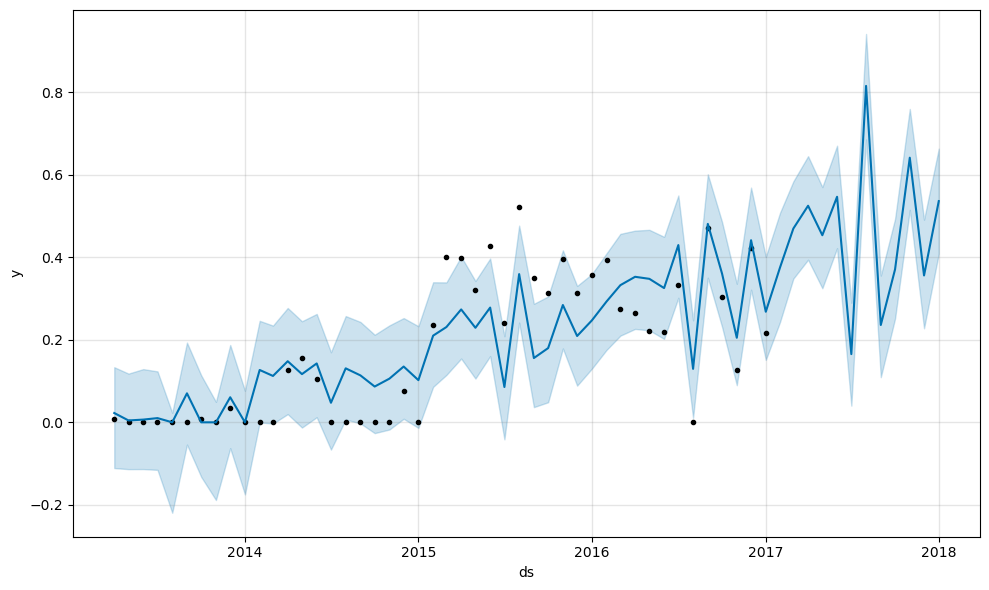

In [14]:
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)
forecast['yhat'] = forecast['yhat'].apply(lambda x: max(x, 0))
forecast['yhat'] = forecast['yhat'].apply(lambda x: min(x, 1))
fig = model.plot(forecast)

In [15]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-04-01,-0.032841,-0.110880,0.133604,-0.032841,-0.032841,0.055385,0.055385,0.055385,0.055385,0.055385,0.055385,0.0,0.0,0.0,0.022544
1,2013-05-01,-0.023483,-0.113515,0.118121,-0.023483,-0.023483,0.028008,0.028008,0.028008,0.028008,0.028008,0.028008,0.0,0.0,0.0,0.004525
2,2013-06-01,-0.013813,-0.113354,0.129005,-0.013813,-0.013813,0.020416,0.020416,0.020416,0.020416,0.020416,0.020416,0.0,0.0,0.0,0.006603
3,2013-07-01,-0.004456,-0.115266,0.123494,-0.004456,-0.004456,0.014681,0.014681,0.014681,0.014681,0.014681,0.014681,0.0,0.0,0.0,0.010225
4,2013-08-01,0.005214,-0.219287,0.023060,0.005214,0.005214,-0.102846,-0.102846,-0.102846,-0.102846,-0.102846,-0.102846,0.0,0.0,0.0,0.000000
5,2013-09-01,0.014884,-0.053990,0.193334,0.014884,0.014884,0.055406,0.055406,0.055406,0.055406,0.055406,0.055406,0.0,0.0,0.0,0.070291
6,2013-10-01,0.024242,-0.132408,0.113839,0.024242,0.024242,-0.029288,-0.029288,-0.029288,-0.029288,-0.029288,-0.029288,0.0,0.0,0.0,0.000000
7,2013-11-01,0.033912,-0.188352,0.049632,0.033912,0.033912,-0.106467,-0.106467,-0.106467,-0.106467,-0.106467,-0.106467,0.0,0.0,0.0,0.000000
8,2013-12-01,0.043270,-0.062556,0.187457,0.043270,0.043270,0.017488,0.017488,0.017488,0.017488,0.017488,0.017488,0.0,0.0,0.0,0.060758
9,2014-01-01,0.052940,-0.174744,0.076614,0.052940,0.052940,-0.095601,-0.095601,-0.095601,-0.095601,-0.095601,-0.095601,0.0,0.0,0.0,0.000000
